In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
df=pd.read_csv('003.csv')
df_univariate=df[['Close']]
df_univariate

,Close
0,132.000000
1,127.250000
2,122.250000
3,120.500000
4,123.750000
...,...
2995,240.300003
2996,251.800003
2997,249.300003
2998,240.000000


In [3]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [4]:
n_steps=3
X,y=prepare_data(np.array(df_univariate['Close']),n_steps)

In [5]:
X_train=X[:295*8]
y_train=y[:2360]
X_test=X[2360:]
y_test=y[2360:]
X_train.shape

(2360, 3)

In [6]:
df_train=pd.DataFrame(X_train)
X_t,x_val,y_t,y_val=train_test_split(df_train,y_train,random_state=104,test_size=0.2,shuffle=True)

In [7]:
X_t=np.array(X_t)
x_val=np.array(x_val)

print(X_t.shape)
print(x_val.shape)
print(y_t.shape)
print(y_val.shape)

(1888, 3)
(472, 3)
(1888,)
(472,)


In [8]:
n_features = 1
X_t = X_t.reshape((X_t.shape[0], X_t.shape[1], n_features))
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], n_features))

Training the data 

In [9]:
from keras.callbacks import EarlyStopping

In [10]:
# define model
model = Sequential()
# earlyStop=EarlyStopping(monitor="val_loss",verbose=1,mode='min',patience=10)
# history=model.fit(X_t,y_t,epochs=100,batch_size=10,validation_data=(x_val,y_val) ,verbose=2,callbacks=[earlyStop])
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
# model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
# earlyStop=EarlyStopping(monitor="val_loss",verbose=1,mode='min',patience=10)
model.fit(X_train,y_train,epochs=200,batch_size=50,verbose=1)

Epoch 1/200
48/48 [==============================] - 2s 4ms/step - loss: 21025.2969
Epoch 2/200
48/48 [==============================] - 0s 3ms/step - loss: 9071.9131
Epoch 3/200
48/48 [==============================] - 0s 3ms/step - loss: 6302.1235
Epoch 4/200
48/48 [==============================] - 0s 3ms/step - loss: 4823.0913
Epoch 5/200
48/48 [==============================] - 0s 3ms/step - loss: 3581.9688
Epoch 6/200
48/48 [==============================] - 0s 3ms/step - loss: 3126.1089
Epoch 7/200
48/48 [==============================] - 0s 3ms/step - loss: 3006.0840
Epoch 8/200
48/48 [==============================] - 0s 3ms/step - loss: 2946.6997
Epoch 9/200
48/48 [==============================] - 0s 3ms/step - loss: 2910.0256
Epoch 10/200
48/48 [==============================] - 0s 3ms/step - loss: 2891.0486
Epoch 11/200
48/48 [==============================] - 0s 3ms/step - loss: 2909.6770
Epoch 12/200
48/48 [==============================] - 0s 3ms/step - loss: 2835.3882


In [11]:
print(X_test[0])

[122.30000305 122.59999847 122.5       ]


In [ ]:
# x_input = X_test[0]
# temp_input=list(x_input)
# lst_output=[]
# i=0
# while(i<10):
    
#     if(len(temp_input)>50):
#         x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
#         #print(x_input)
#         x_input = x_input.reshape((1, n_steps, n_features))
#         #print(x_input)
#         yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
#         temp_input.append(yhat[0][0])
#         temp_input=temp_input[1:]
#         #print(temp_input)
#         lst_output.append(yhat[0][0])
#         i=i+1
#     else:
#         x_input = x_input.reshape((1, n_steps, n_features))
#         yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
#         temp_input.append(yhat[0][0])
#         lst_output.append(yhat[0][0])
#         i=i+1
    

# print(lst_output)

In [14]:
x_input = (X_test[0])
temp_input = list(x_input)
lst_output = []
i = 0

while i < len(X_test):
    if len(temp_input) > 3:
        # print(i)
        x_input = np.array(temp_input[1:])
        # print('this is x input',x_input)
        x_input = x_input.reshape((1, 3, 1))  # Correct the shape here
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(float(yhat[0][0]))
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input = x_input.reshape((1, 3, 1))  # Correct the shape here
        yhat = model.predict(x_input, verbose=0)
        # print('this is yhat',yhat[0][0])
        temp_input.append(float(yhat[0][0]))
        lst_output.append(yhat[0][0])
        i += 1

# print(lst_output)
for i in range(len(lst_output)):
    lst_output[i]=float(lst_output[i])

print(lst_output)

[132.4578094482422, 132.4144744873047, 132.4288787841797, 131.2552032470703, 131.25904846191406, 131.2577667236328, 131.3666229248047, 131.3662567138672, 131.3663787841797, 131.35594177246094, 131.35595703125, 131.35595703125, 131.35694885253906, 131.35694885253906, 131.35694885253906, 131.3568572998047, 131.3568572998047, 131.3568572998047, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.35687255859375, 131.356872558593

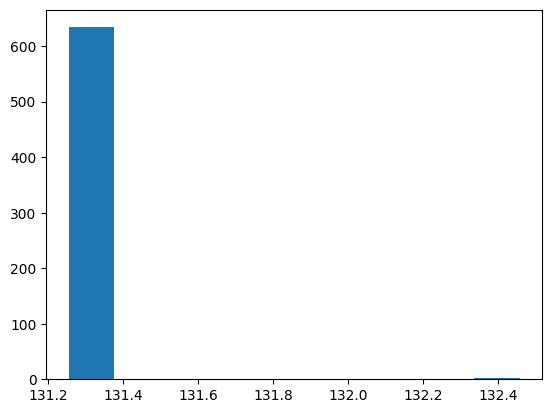

In [15]:
import matplotlib.pyplot as plt
plt.hist(lst_output)
plt.show()